# **Kaggle House Price Prediction Competition**
### **Author**: Ishaan Bhandari

This notebook is part of a Kaggle competition to predict house prices from various residential home features. I aimed to build accurate predictive models using RandomForest, Gradient Boosting, and Support Vector Regression (SVR), with evaluation based on RMSE between the logarithmic predictions and actual sale prices.

In [31]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
train_data = pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Imports & Train Data Split

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def calculate_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

#splitting into train/validation sets(80/20)

X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [36]:
#converting categorical data to binary values with one-hot vectors
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)

#transforming validation data using training data encoder
X_val_encoded = encoder.transform(X_val)

#scaling the encoded data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid, cross_val_score
from sklearn.metrics import make_scorer
import numpy as np
import pandas as pd

###Tuning Random Forest Model Hyperparameters using Grid search:



In [38]:
neg_rmse_scorer = make_scorer(calculate_rmse, greater_is_better=False)

# hyperparameter grid
param_grid = ParameterGrid({
    'n_estimators': [50, 100],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 4],
    'random_state': [42]
})

rf_model = RandomForestRegressor(random_state=42)

#storing all results and best model
results = []
best_rmse = float('inf')
best_params = None

#traversing the grid
for i, params in enumerate(param_grid):
    rf_model.set_params(**params)
    scores = cross_val_score(rf_model, X_train_encoded, y_train, cv=3, scoring=neg_rmse_scorer)
    mean_rmse = -np.mean(scores)
    results.append({**params, 'mean_rmse': mean_rmse})
    print(f"Done with set {i+1}/{len(param_grid)}, params: {params}, Mean CV RMSE: {mean_rmse}")
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_params = params

#printing best params
print(f"Best parameters: {best_params}, Best RMSE: {best_rmse}")

#converting to df for plot
rf_df = pd.DataFrame(results)

Done with set 1/36, params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}, Mean CV RMSE: 35809.339586689974
Done with set 2/36, params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}, Mean CV RMSE: 35770.978741696636
Done with set 3/36, params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 42}, Mean CV RMSE: 35809.339586689974
Done with set 4/36, params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100, 'random_state': 42}, Mean CV RMSE: 35770.978741696636
Done with set 5/36, params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50, 'random_state': 42}, Mean CV RMSE: 35809.339586689974
Done with set 6/36, params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 42}, Mean CV RMSE: 35770.97874169

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

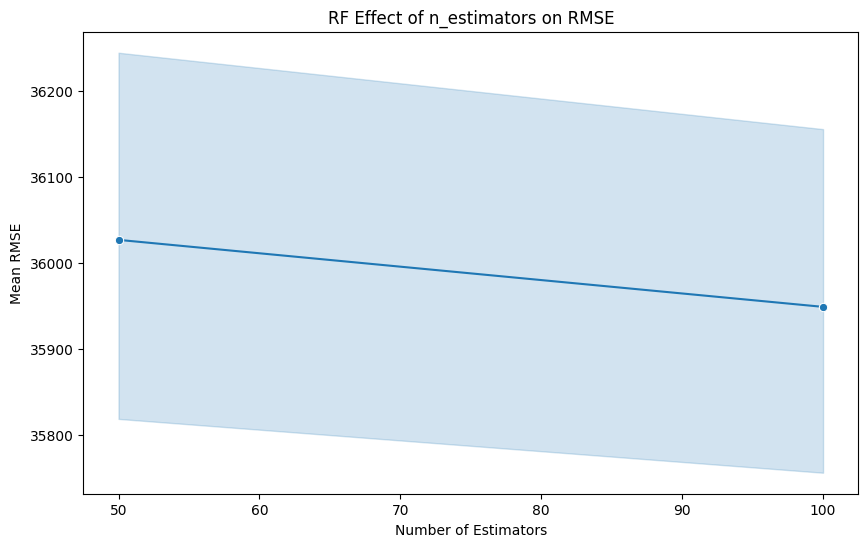

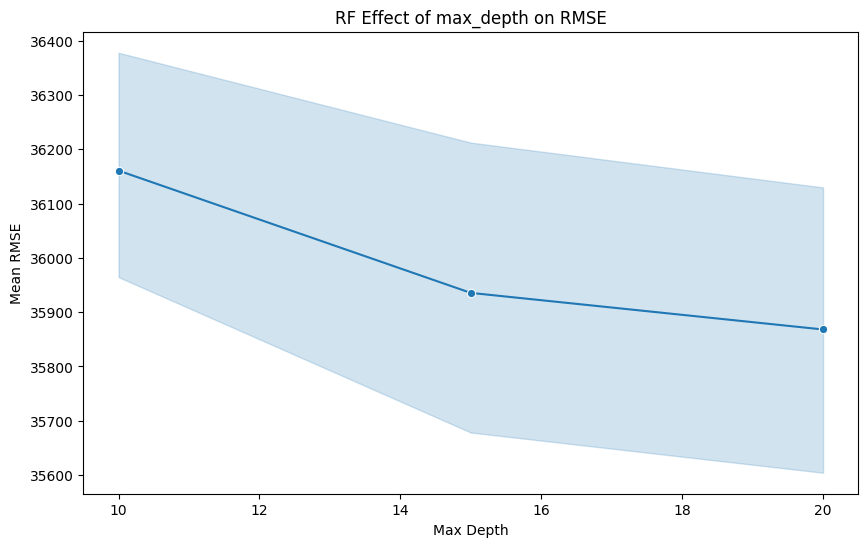

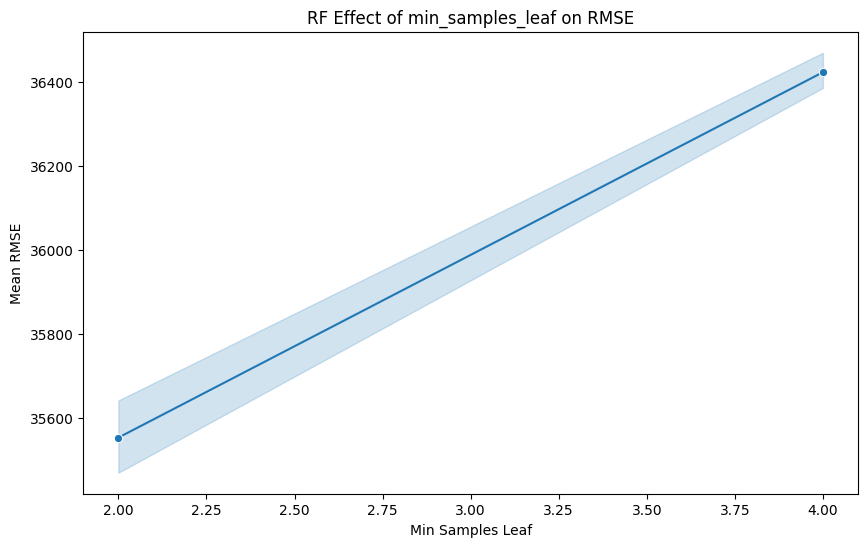

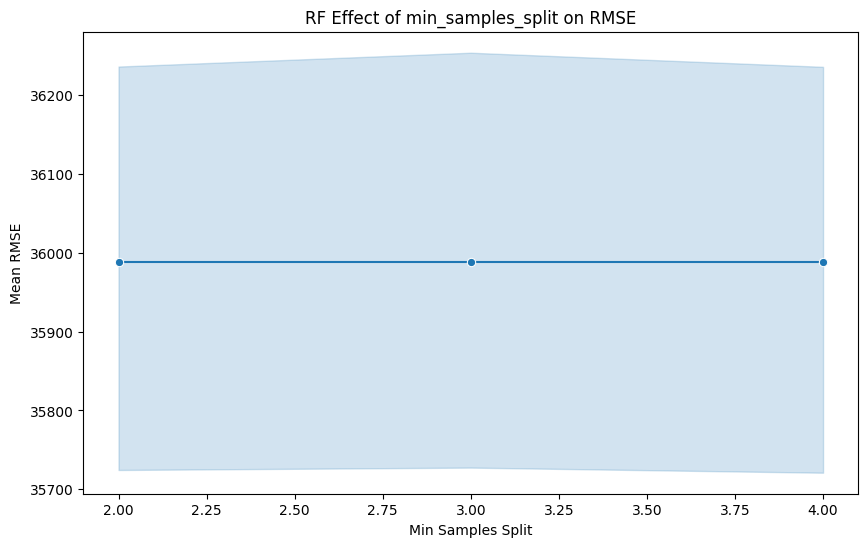

In [56]:
#n_estimators vs. RSME
plt.figure(figsize=(10, 6))
sns.lineplot(data=rf_df, x='n_estimators', y='mean_rmse', marker='o')
plt.title('RF Effect of n_estimators on RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean RMSE')
plt.show()

#max_depth vs. RSME
plt.figure(figsize=(10, 6))
sns.lineplot(data=rf_df, x='max_depth', y='mean_rmse', marker='o')
plt.title('RF Effect of max_depth on RMSE')
plt.xlabel('Max Depth')
plt.ylabel('Mean RMSE')
plt.show()

#min_samples_leaf vs. RSME
plt.figure(figsize=(10, 6))
sns.lineplot(data=rf_df, x='min_samples_leaf', y='mean_rmse', marker='o')
plt.title('RF Effect of min_samples_leaf on RMSE')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean RMSE')
plt.show()

#min_samples_split vs. RSME
plt.figure(figsize=(10, 6))
sns.lineplot(data=rf_df, x='min_samples_split', y='mean_rmse', marker='o')
plt.title('RF Effect of min_samples_split on RMSE')
plt.xlabel('Min Samples Split')
plt.ylabel('Mean RMSE')
plt.show()

###Tuning Gradient Boosting Model Hyperparameters using Grid search:

In [41]:
#training gradient boosted model
from sklearn.metrics import make_scorer, mean_squared_error

def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# hyperparameter grid
param_grid = ParameterGrid({
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.15],
    'min_samples_leaf': [1, 4, 6],
})

gbm = GradientBoostingRegressor(random_state=42)

neg_rmse_scorer = make_scorer(calculate_rmse, greater_is_better=False)

#storing all results and best model
best_rmse = float('inf')
best_params = None
results = []

#traversing the grid
for i, params in enumerate(param_grid):
    gbm.set_params(**params)
    gbm.fit(X_train_encoded, y_train)
    y_pred_gbm = gbm.predict(X_val_encoded)
    rmse = calculate_rmse(y_val, y_pred_gbm)
    results.append({**params, 'rmse': rmse})
    print(f"Done with set {i+1}/{len(param_grid)}, params: {params}, RMSE: {rmse}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

#printing the best params
print(f"Best parameters: {best_params}, Best RMSE: {best_rmse}")

#converting to df for plotting
gb_df= pd.DataFrame(results)


Done with set 1/27, params: {'learning_rate': 0.01, 'min_samples_leaf': 1, 'n_estimators': 100}, RMSE: 58226.26760666607
Done with set 2/27, params: {'learning_rate': 0.01, 'min_samples_leaf': 1, 'n_estimators': 300}, RMSE: 41140.78510422998
Done with set 3/27, params: {'learning_rate': 0.01, 'min_samples_leaf': 1, 'n_estimators': 500}, RMSE: 36874.24769711852
Done with set 4/27, params: {'learning_rate': 0.01, 'min_samples_leaf': 4, 'n_estimators': 100}, RMSE: 55437.04137875483
Done with set 5/27, params: {'learning_rate': 0.01, 'min_samples_leaf': 4, 'n_estimators': 300}, RMSE: 38281.607319324256
Done with set 6/27, params: {'learning_rate': 0.01, 'min_samples_leaf': 4, 'n_estimators': 500}, RMSE: 34574.30503563501
Done with set 7/27, params: {'learning_rate': 0.01, 'min_samples_leaf': 6, 'n_estimators': 100}, RMSE: 55205.02077435898
Done with set 8/27, params: {'learning_rate': 0.01, 'min_samples_leaf': 6, 'n_estimators': 300}, RMSE: 39000.83271392607
Done with set 9/27, params: {'l

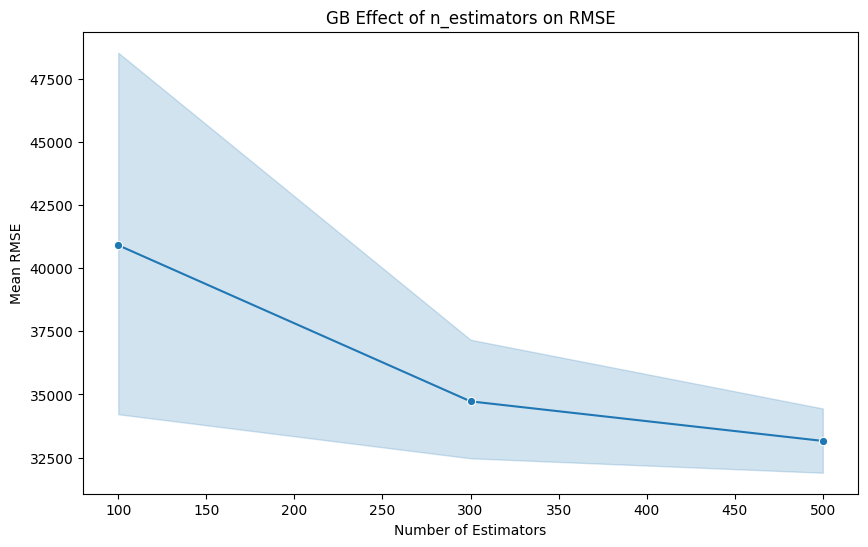

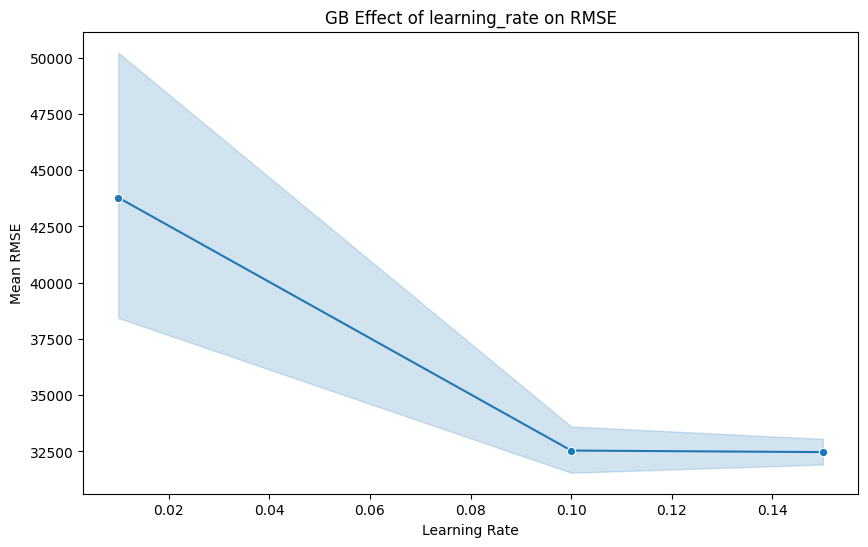

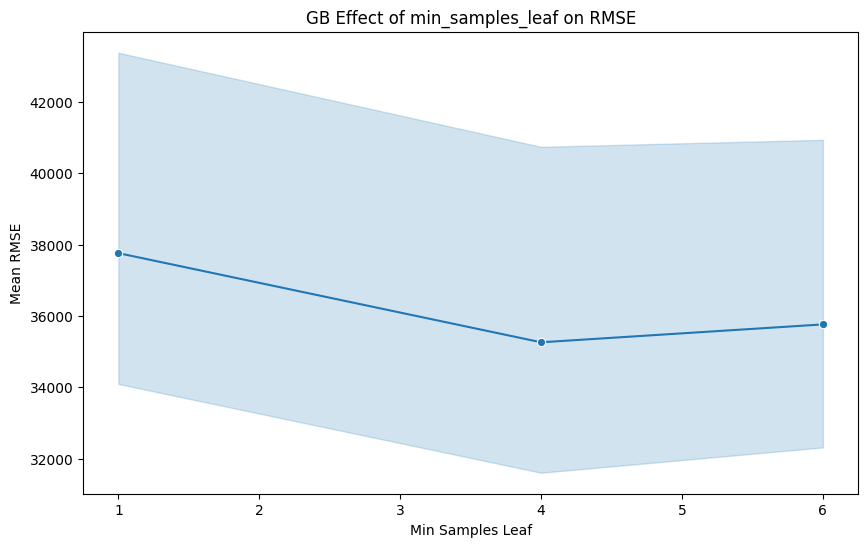

In [57]:
#n_estimators vs. RSME
plt.figure(figsize=(10, 6))
sns.lineplot(data=gb_df, x='n_estimators', y='rmse', marker='o')
plt.title('GB Effect of n_estimators on RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean RMSE')
plt.show()

#learning_rate vs. RSME
plt.figure(figsize=(10, 6))
sns.lineplot(data=gb_df, x='learning_rate', y='rmse', marker='o')
plt.title('GB Effect of learning_rate on RMSE')
plt.xlabel('Learning Rate')
plt.ylabel('Mean RMSE')
plt.show()

#min_samples_leaf vs. RSME
plt.figure(figsize=(10, 6))
sns.lineplot(data=gb_df, x='min_samples_leaf', y='rmse', marker='o')
plt.title('GB Effect of min_samples_leaf on RMSE')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean RMSE')
plt.show()

###Tuning Support Vector Regression Hyperparameters using Grid search:

In [43]:
#creating the parameter grid
param_grid = ParameterGrid({
    'C': [0.1, 1.0, 10.0, 100, 1000],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'coef0': [0.0, 1.0, 10.0]
})


svm_model = SVR(kernel = 'linear')

neg_rmse_scorer = make_scorer(calculate_rmse, greater_is_better=False)

#storing all results and best model
best_rmse = float('inf')
best_params = None
results = []

#traversing the grid
for i, params in enumerate(param_grid):
    svm_model.set_params(**params)
    svm_model.fit(X_train_scaled, y_train)
    y_pred_svm = svm_model.predict(X_val_scaled)
    rmse = calculate_rmse(y_val, y_pred_svm)
    results.append({**params, 'rmse': rmse})
    print(f"Done with set {i+1}/{len(param_grid)}, params: {params}, RMSE: {rmse}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

#printing the best values
print(f"Best parameters: {best_params}, Best RMSE: {best_rmse}")

#converting results to df to plot
svm_results = pd.DataFrame(results)

Done with set 1/180, params: {'C': 0.1, 'coef0': 0.0, 'epsilon': 0.01, 'kernel': 'linear'}, RMSE: 87191.2156912692
Done with set 2/180, params: {'C': 0.1, 'coef0': 0.0, 'epsilon': 0.01, 'kernel': 'rbf'}, RMSE: 88667.23288040045
Done with set 3/180, params: {'C': 0.1, 'coef0': 0.0, 'epsilon': 0.01, 'kernel': 'poly'}, RMSE: 88667.1459103314
Done with set 4/180, params: {'C': 0.1, 'coef0': 0.0, 'epsilon': 0.01, 'kernel': 'sigmoid'}, RMSE: 88667.03701407551
Done with set 5/180, params: {'C': 0.1, 'coef0': 0.0, 'epsilon': 0.1, 'kernel': 'linear'}, RMSE: 87191.2132797737
Done with set 6/180, params: {'C': 0.1, 'coef0': 0.0, 'epsilon': 0.1, 'kernel': 'rbf'}, RMSE: 88667.23920990051
Done with set 7/180, params: {'C': 0.1, 'coef0': 0.0, 'epsilon': 0.1, 'kernel': 'poly'}, RMSE: 88667.15995827185
Done with set 8/180, params: {'C': 0.1, 'coef0': 0.0, 'epsilon': 0.1, 'kernel': 'sigmoid'}, RMSE: 88667.04360161381
Done with set 9/180, params: {'C': 0.1, 'coef0': 0.0, 'epsilon': 0.5, 'kernel': 'linear

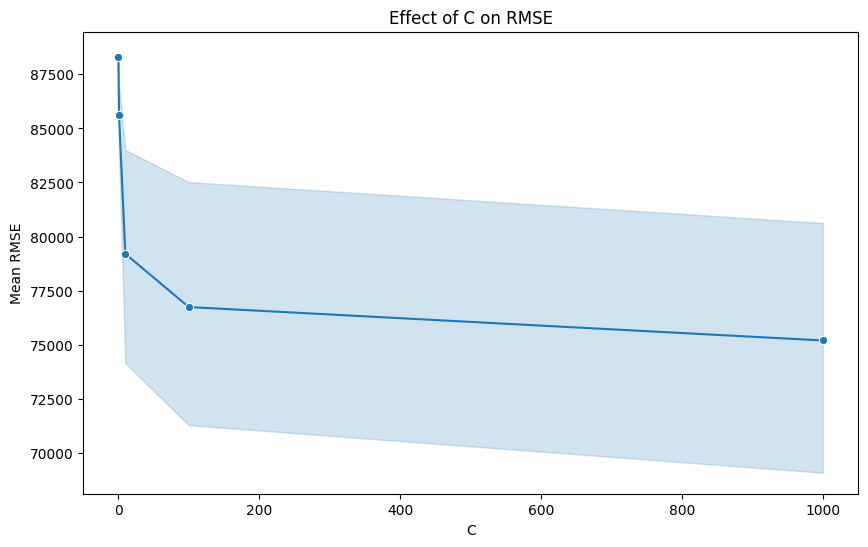

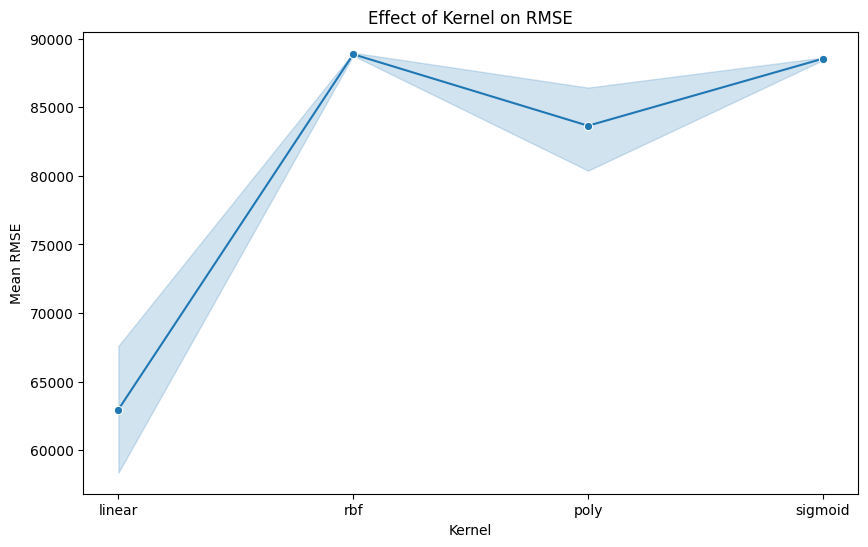

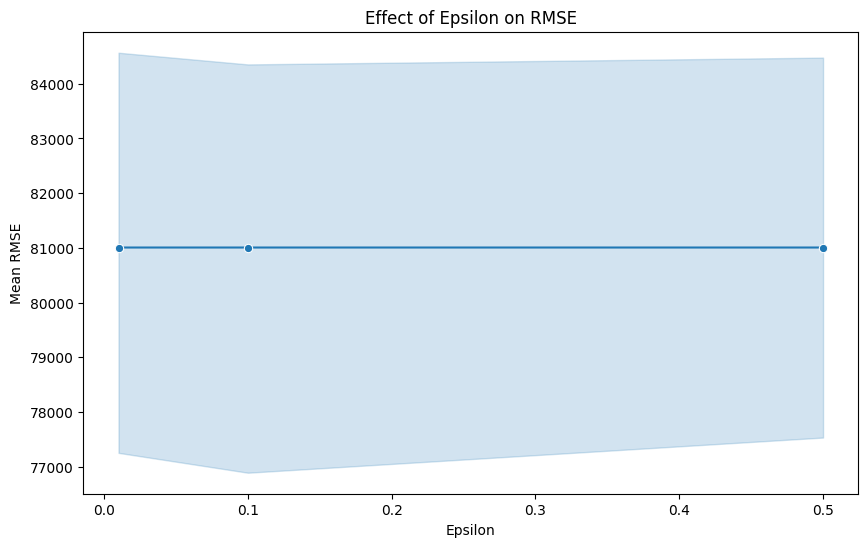

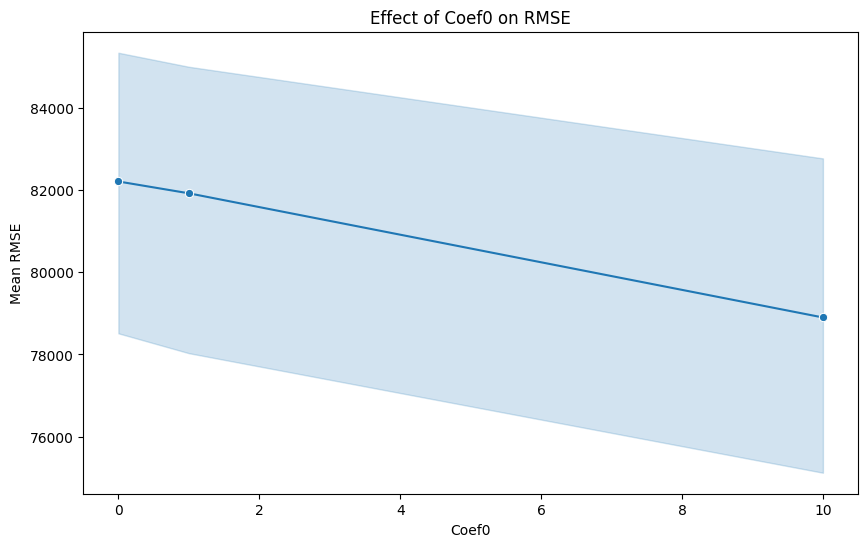

In [58]:
#Regularization Parameter(C) vs. RSME
plt.figure(figsize=(10, 6))
sns.lineplot(data=svm_results, x='C', y='rmse', marker='o')
plt.title('Effect of C on RMSE')
plt.xlabel('C')
plt.ylabel('Mean RMSE')
plt.show()

#Kernel vs. RSME
plt.figure(figsize=(10, 6))
sns.lineplot(data=svm_results, x='kernel', y='rmse', marker='o')
plt.title('Effect of Kernel on RMSE')
plt.xlabel('Kernel')
plt.ylabel('Mean RMSE')
plt.show()

#Epsilon vs. RSME
plt.figure(figsize=(10, 6))
sns.lineplot(data=svm_results, x='epsilon', y='rmse', marker='o')
plt.title('Effect of Epsilon on RMSE')
plt.xlabel('Epsilon')
plt.ylabel('Mean RMSE')
plt.show()

#Coef0 vs. RSME
plt.figure(figsize=(10, 6))
sns.lineplot(data=svm_results, x='coef0', y='rmse', marker='o')
plt.title('Effect of Coef0 on RMSE')
plt.xlabel('Coef0')
plt.ylabel('Mean RMSE')
plt.show()


### Training models on combined test & validation data

In [45]:
#combining the original and validation data
X_train_val_combined = pd.concat([X_train, X_val])
y_train_val_combined = pd.concat([y_train, y_val])

X_train_val_encoded = encoder.transform(X_train_val_combined)

X_train_val_scaled = scaler.transform(X_train_val_encoded)

In [63]:
test_data = pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [47]:
X_test_encoded = encoder.transform(test_data)
X_test_scaled = scaler.transform(X_test_encoded)

In [48]:
rf_model_best = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42)
rf_model_best.fit(X_train_val_scaled, y_train_val_combined)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, random_state=42)

In [49]:
gbm_model_best = GradientBoostingRegressor(learning_rate=0.1, min_samples_leaf=4, n_estimators=500, random_state=42)
gbm_model_best.fit(X_train_val_scaled, y_train_val_combined)

GradientBoostingRegressor(min_samples_leaf=4, n_estimators=500, random_state=42)

In [50]:
svr_model_best = SVR(C=100, coef0=0.0, epsilon=0.01, kernel='linear')
svr_model_best.fit(X_train_val_scaled, y_train_val_combined)

SVR(C=100, epsilon=0.01, kernel='linear')

In [51]:
#making predictions using each of the 3 models
y_pred_rf = rf_model_best.predict(X_test_scaled)
y_pred_gbm = gbm_model_best.predict(X_test_scaled)
y_pred_svr = svr_model_best.predict(X_test_scaled)


###Downloading Prediction Output

In [52]:
from google.colab import files

#rf predictions
submission_rf = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': y_pred_rf
})
submission_rf.to_csv('rf_submission.csv', index=False)
#files.download('rf_submission.csv')

#gb predictions
submission_gbm = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': y_pred_gbm
})
submission_gbm.to_csv('gbm_submission.csv', index=False)
files.download('gbm_submission.csv')

#svr predictions
submission_svr = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': y_pred_svr
})
submission_svr.to_csv('svr_submission.csv', index=False)
files.download('svr_submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Results After Submitting to the Leaderboard(Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price):
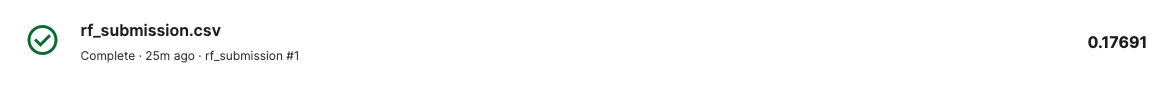


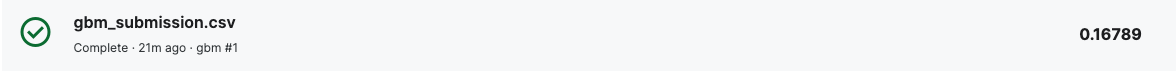

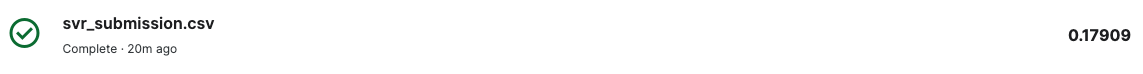

# We can see that the **Gradient Boosting Model** performed the best, achieving an RSME of **0.16789**

## Now, for each model, using the best hyperparameters, we will retrain the model while varying the size of the train set, e.g. using 1%, 5%, 10%, 25%, 50% 100% of data.




In [53]:
train_size = [1, 5, 10, 25, 50, 100]
rf_rmse, gbm_rmse, svr_rmse = [], [], []
for val in train_size:
  if val == 100:
      print(f"Training Size: {val}% - No validation data available for performance evaluation.")
      break
  #splitting data into train and validation
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=val/100, random_state=42)

  #converting categorical data to binary values with one-hot vectors
  encoder = OneHotEncoder(handle_unknown='ignore')
  X_train_encoded = encoder.fit_transform(X_train)
  X_val_encoded = encoder.transform(X_val)

  #scaling the encoded data
  scaler = StandardScaler(with_mean=False)
  X_train_scaled = scaler.fit_transform(X_train_encoded)
  X_val_scaled = scaler.transform(X_val_encoded)

  #creating each of the models

  temp_rf = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42)
  temp_rf.fit(X_train_scaled, y_train)

  temp_gbm = GradientBoostingRegressor(learning_rate=0.1, min_samples_leaf=4, n_estimators=500, random_state=42)
  temp_gbm.fit(X_train_scaled, y_train)

  temp_svr = SVR(C=100, coef0=0.0, epsilon=0.01, kernel='linear')
  temp_svr.fit(X_train_scaled, y_train)

  #testing on val data
  y_pred_rf = temp_rf.predict(X_val_scaled)
  y_pred_gbm = temp_gbm.predict(X_val_scaled)
  y_pred_svr = temp_svr.predict(X_val_scaled)

  rmse_rf = calculate_rmse(y_val, y_pred_rf)
  rmse_gbm = calculate_rmse(y_val, y_pred_gbm)
  rmse_svr = calculate_rmse(y_val, y_pred_svr)

  rf_rmse.append(rmse_rf)
  gbm_rmse.append(rmse_gbm)
  svr_rmse.append(rmse_svr)

  print(f"Training Size: {val}% - RF RMSE: {rmse_rf:.2f}, GBM RMSE: {rmse_gbm:.2f}, SVR RMSE: {rmse_svr:.2f}")


Training Size: 1% - RF RMSE: 68904.13, GBM RMSE: 69685.81, SVR RMSE: 76243.84
Training Size: 5% - RF RMSE: 46870.13, GBM RMSE: 44675.39, SVR RMSE: 54214.37
Training Size: 10% - RF RMSE: 44956.43, GBM RMSE: 43108.96, SVR RMSE: 51490.80
Training Size: 25% - RF RMSE: 40346.87, GBM RMSE: 36733.06, SVR RMSE: 49119.04
Training Size: 50% - RF RMSE: 38148.93, GBM RMSE: 34829.29, SVR RMSE: 47460.46
Training Size: 100% - No validation data available for performance evaluation.


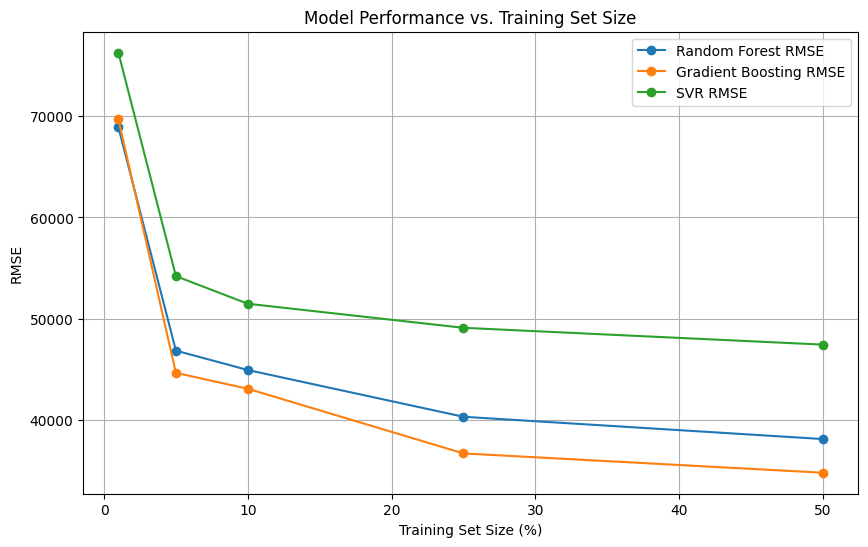

In [54]:
train_size = train_size[:-1]
plt.figure(figsize=(10, 6))
plt.plot(train_size, rf_rmse, label='Random Forest RMSE', marker='o')
plt.plot(train_size, gbm_rmse, label='Gradient Boosting RMSE', marker='o')
plt.plot(train_size, svr_rmse, label='SVR RMSE', marker='o')

plt.xlabel('Training Set Size (%)')
plt.ylabel('RMSE')
plt.title('Model Performance vs. Training Set Size')
plt.legend()

plt.grid(True)
plt.show()

In [64]:
# from https://gist.github.com/jonathanagustin/b67b97ef12c53a8dec27b343dca4abba
# install can take a minute

import os
# @title Convert Notebook to PDF. Save Notebook to given directory
NOTEBOOKS_DIR = "/content/drive/My Drive" # @param {type:"string"}
NOTEBOOK_NAME = "HousePriceRegression.ipynb" # @param {type:"string"}
#------------------------------------------------------------------------------#
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
NOTEBOOK_PATH = f"{NOTEBOOKS_DIR}/{NOTEBOOK_NAME}"
assert os.path.exists(NOTEBOOK_PATH), f"NOTEBOOK NOT FOUND: {NOTEBOOK_PATH}"
!apt install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!jupyter nbconvert "$NOTEBOOK_PATH" --to pdf > /dev/null 2>&1
NOTEBOOK_PDF = NOTEBOOK_PATH.rsplit('.', 1)[0] + '.pdf'
assert os.path.exists(NOTEBOOK_PDF), f"ERROR MAKING PDF: {NOTEBOOK_PDF}"
print(f"PDF CREATED: {NOTEBOOK_PDF}")

Mounted at /content/drive/
PDF CREATED: /content/drive/My Drive/HousePriceRegression.pdf
